In [ ]:
pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 44.5 MB/s eta 0:00:00


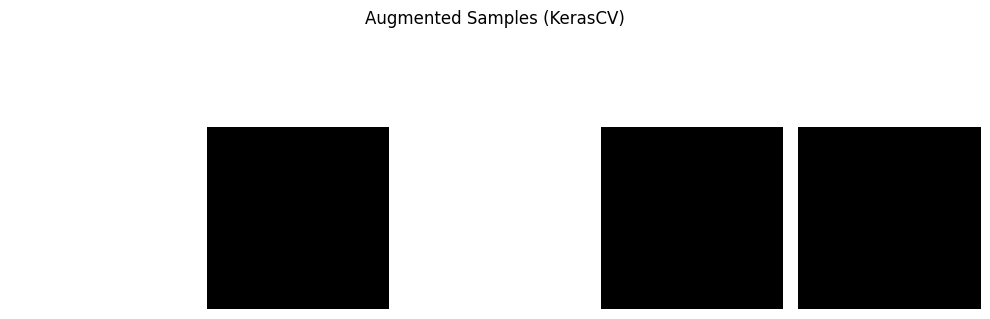

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 152ms/step - accuracy: 0.0987 - loss: 2.5854 - val_accuracy: 0.0950 - val_loss: 2.3112
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.1002 - loss: 2.3107 - val_accuracy: 0.0994 - val_loss: 2.3025
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - accuracy: 0.1013 - loss: 2.3049 - val_accuracy: 0.0970 - val_loss: 2.3027
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 160ms/step - accuracy: 0.1031 - loss: 2.3033 - val_accuracy: 0.0978 - val_loss: 2.3026
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 148ms/step - accuracy: 0.1003 - loss: 2.3050 - val_accuracy: 0.0984 - val_loss: 2.3029
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 147ms/step - accuracy: 0.1026 - loss: 2.3076 - val_accuracy: 0.1018 - val_loss: 2.3029
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 155ms/step - accuracy: 0.1011 - loss: 2.3078 - val_accuracy: 0.0962 - val_loss: 2.3030
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.0968 - loss: 2

In [ ]:
# 09_keras_cv_augmentation.ipynb

# 📌 Objective: Demonstrate image augmentation using KerasCV layers (TensorFlow native)

import tensorflow as tf
import keras_cv
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# ✅ Load sample dataset (CIFAR-10 for image augmentation)
(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0

# ✅ Define KerasCV augmentation pipeline
augmenter = keras_cv.layers.Augmenter(
    layers=[
        keras_cv.layers.RandomFlip("horizontal"),
        keras_cv.layers.RandomRotation(0.1),
        keras_cv.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        keras_cv.layers.RandomBrightness(factor=0.2)
    ]
)

# ✅ Visualize augmentations
def plot_augmented_samples(images, augmenter, n=5):
    plt.figure(figsize=(n * 2, 4))
    for i in range(n):
        aug_img = augmenter(images[i:i+1])[0]
        plt.subplot(1, n, i + 1)
        plt.imshow(aug_img)
        plt.axis("off")
    plt.suptitle("Augmented Samples (KerasCV)")
    plt.tight_layout()
    plt.show()

# ✅ Display samples
plot_augmented_samples(x_train, augmenter)

# ✅ Integrate into training pipeline
def build_augmented_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = augmenter(inputs)  # 👈 apply augmentation in pipeline
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_augmented_model()

# ✅ Train the model with on-the-fly augmentation
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=1)